## Anas Majeed [ 21011519-019 ]
## Nauman Ali [21011519-036]
## BS CS 5th sem (C)

# Crop Analysis and Prediction

### CROP RECOMMENDATION USING WEATHER AND SOIL CONTENT

Machine Learning is well equipped when it comes to analyzing data regarding soil conditions, including moisture level, temperature, and chemical makeup, all of which have an impact upon crop growth and livestock well-being.

Today in agriculture, this can allow crops to be grown at much higher precision, enabling farmers to treat plants and animals almost individually, which in turn significantly increases the effectiveness of farmers' decisions.

Using this can develop means to even predict harvest yields and evaluate crop quality for individual plant species to detect crop disease and weed infestations which were previouly impossible!
This Python 3 environment comes with many helpful analytics lib

### Features

1. N (Nitrogen): The amount of nitrogen in the soil, a critical nutrient for plant growth.
2. P (Phosphorus): The level of phosphorus in the soil, essential for energy transfer in plants.
3. K (Potassium): The concentration of potassium in the soil, important for overall plant health and development.
4. Temperature: The ambient temperature of the environment, affecting crop growth.
5. Humidity: The moisture content in the air, influencing the water needs of crops.
6. pH: The acidity or alkalinity of the soil, impacting nutrient availability to plants.
7. Rainfall: The amount of precipitation, a crucial factor in determining water supply for crops.
8. Label: The target variable indicating the recommended crop based on the given soil and weather conditions

### MultiClass Classification Problem

1. Rice: A staple cereal grain grown in flooded fields, widely consumed globally.
2. Maize: A versatile cereal crop used for human consumption, animal feed, and various industrial products.
3. Chickpea: An edible legume rich in protein, commonly used in various cuisines.
4. Kidney Beans: Nutrient-dense legumes known for their kidney-like shape and protein content.
5. Pigeon Peas: Legumes cultivated for their high protein content and culinary uses.
6. Moth Beans: Small, drought-resistant legumes cultivated for human consumption.
7. Mung Bean: Nutrient-rich legumes often used in Asian cuisine.
8. Black Gram: Highly nutritious legumes commonly used in South Asian cooking.
9. Lentil: Edible pulses rich in protein and commonly used in various cuisines.
10. Pomegranate: A fruit-bearing shrub producing nutrient-rich, antioxidant-packed seeds.
11. Banana: A tropical fruit cultivated for its edible, elongated berries.
12. Mango: A popular tropical fruit known for its sweet and juicy flesh.
13. Grapes: Berries grown for fresh consumption or used in the production of wine.
14. Watermelon: A refreshing and hydrating fruit with sweet, juicy flesh.
15. Muskmelon: A type of melon with a sweet, fragrant aroma and orange flesh.
16. Apple: A widely consumed fruit known for its crisp texture and various varieties.
17. Orange: Citrus fruit known for its tangy flavor and high vitamin C content.
18. Papaya: Tropical fruit with orange flesh and numerous health benefits.
19. Coconut: A versatile fruit with uses ranging from culinary to cosmetic.
20. Cotton: A fiber crop used in textile production.
21. Jute: Fibrous plant used for making textiles and various products.
22. Coffee: A globally popular beverage crop produced from coffee beans.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.shape

(2200, 8)

In [4]:
df.columns 

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
df.head(1277)

N    P    K  temperature   humidity        ph    rainfall   label
0     90   42   43    20.879744  82.002744  6.502985  202.935536    rice
1     85   58   41    21.770462  80.319644  7.038096  226.655537    rice
2     60   55   44    23.004459  82.320763  7.840207  263.964248    rice
3     74   35   40    26.491096  80.158363  6.980401  242.864034    rice
4     78   42   42    20.130175  81.604873  7.628473  262.717340    rice
...   ..  ...  ...          ...        ...       ...         ...     ...
1272  34  133  202    15.314135  80.097114  5.804799   74.821447  grapes
1273  35  135  199    21.774667  80.549426  6.400720   69.396304  grapes
1274  16  145  199    26.916248  80.768389  5.953966   69.309272  grapes
1275   8  136  201    41.656030  82.221182  5.609256   74.196648  grapes
1276  25  129  195    17.986678  81.177121  5.777271   72.371277  grapes

[1277 rows x 8 columns]

In [6]:
df.sample(7)

N   P   K  temperature   humidity        ph    rainfall       label
1779   68  69  52    25.654923  92.745016  6.813383   52.954779      papaya
12     78  58  44    26.800796  80.886848  5.108682  284.436457        rice
553    39  36  22    29.343174  60.503209  9.072011   34.033355   mothbeans
499    33  61  24    20.046118  48.939056  4.567446  122.456420  pigeonpeas
882    14  74  15    27.999903  65.576534  6.493037   49.940431      lentil
2134   86  31  35    27.012073  60.766453  6.485761  191.450893      coffee
1402  101  25  52    29.099104  94.222378  6.750146   22.524973   muskmelon

In [7]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Cumulative statistics description

In [8]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Univeriate Analysis

In [10]:
#values for crops
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
#counting with respect to Crops

df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Graphical Analysis

<Axes: xlabel='count', ylabel='label'>

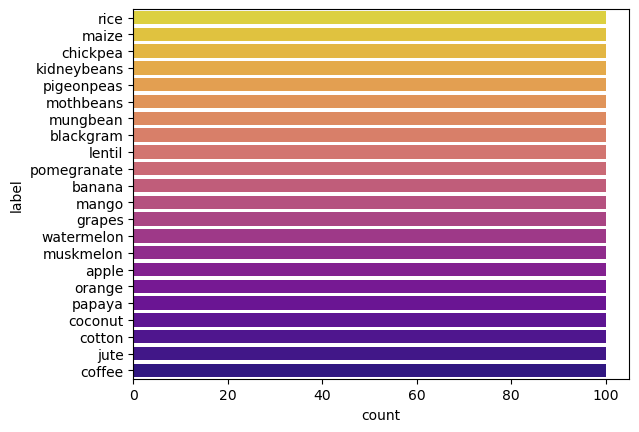

In [12]:
sns.countplot(y='label',data=df, palette="plasma_r")


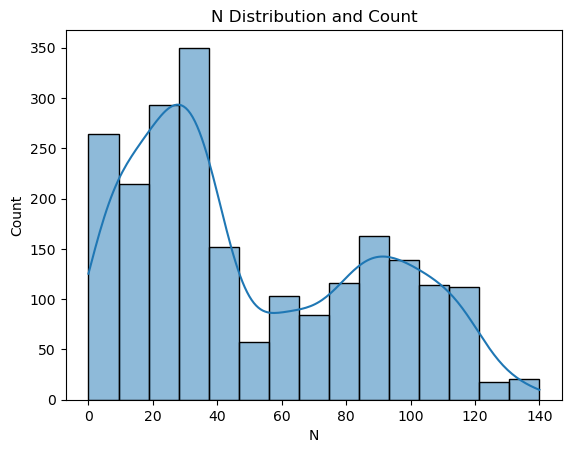

In [13]:
sns.histplot(df["N"] , kde = True)
plt.xlabel('N')
plt.ylabel('Count')
plt.title('N Distribution and Count')
plt.show()

#plt.hist(df["N"],bins=18, rwidth=0.8)
#plt.xlabel('N')
#plt.ylabel('Count')
#plt.title('N Distribution and Count')
#plt.show()

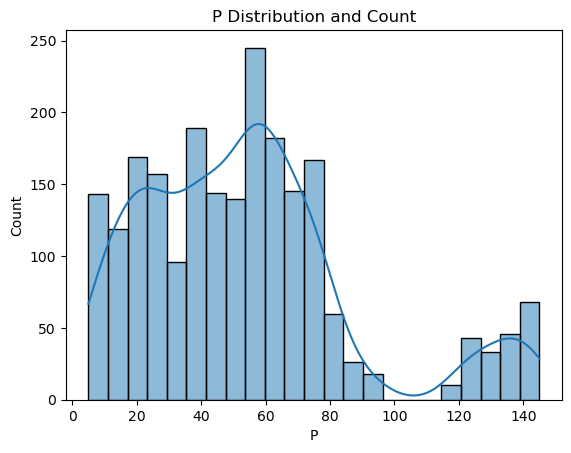

In [14]:
sns.histplot(df["P"] , kde = True)
plt.xlabel('P')
plt.ylabel('Count')
plt.title('P Distribution and Count')
plt.show()


#plt.hist(df["P"],bins=18, rwidth=0.8)
#plt.xlabel('P')
#plt.ylabel('Count')
#plt.title('P Distribution and Count')
#plt.show()


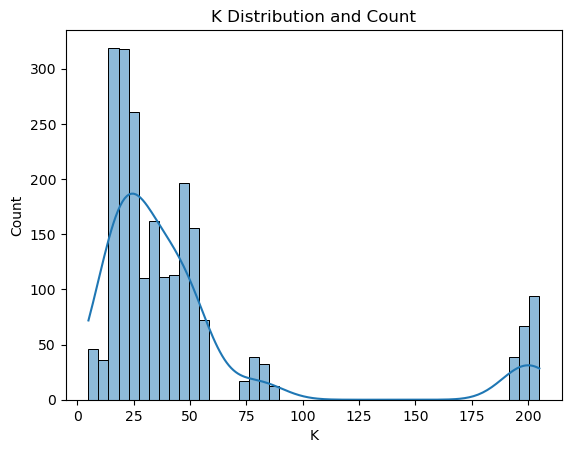

In [15]:
sns.histplot(df["K"] , kde = True)
plt.xlabel('K')
plt.ylabel('Count')
plt.title('K Distribution and Count')
plt.show()

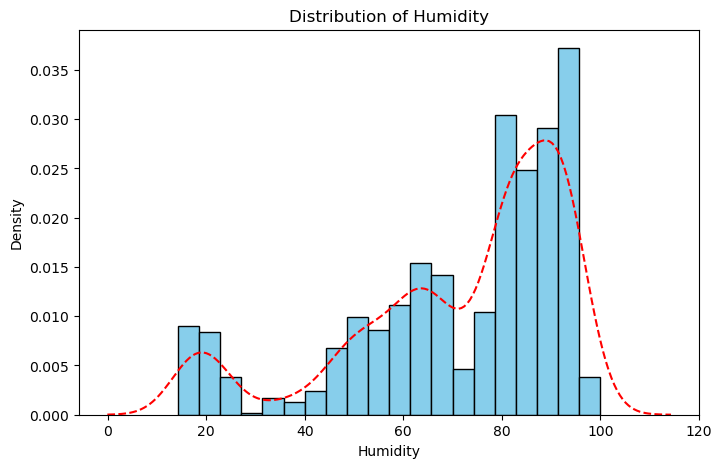

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(df['humidity'], bins=20, density=True,color='skyblue', edgecolor='black')
sns.kdeplot(df['humidity'], color='red', linestyle='dashed')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Density')

plt.show()

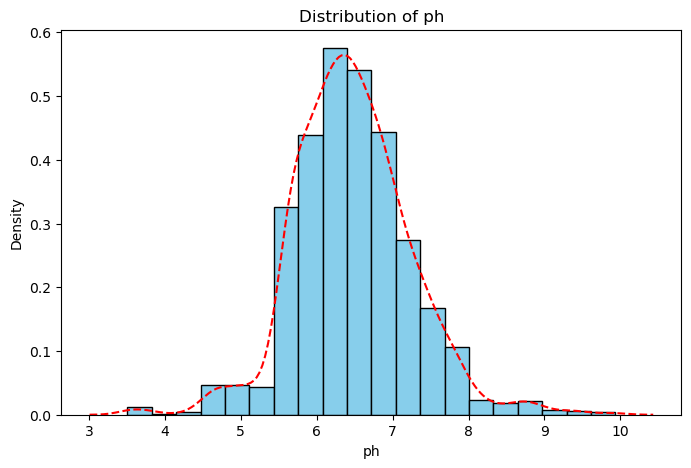

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(df['ph'], bins=20, density=True,color='skyblue', edgecolor='black')
sns.kdeplot(df['ph'], color='red', linestyle='dashed')
plt.title('Distribution of ph')
plt.xlabel('ph')
plt.ylabel('Density')

plt.show()

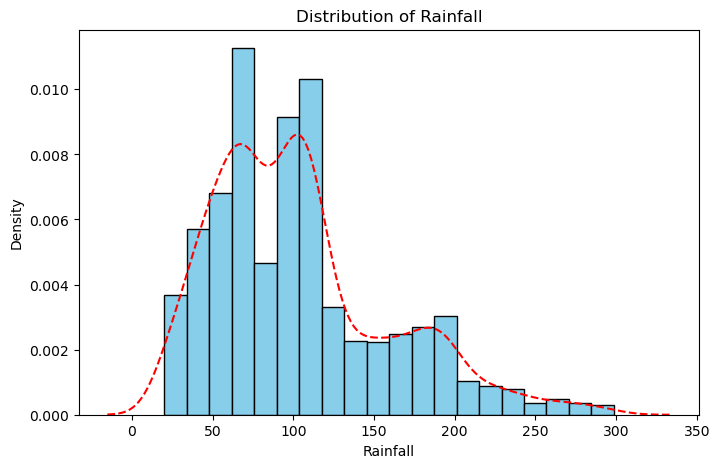

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(df['rainfall'], bins=20, density=True,color='skyblue', edgecolor='black')
sns.kdeplot(df['rainfall'], color='red', linestyle='dashed')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Density')

plt.show()

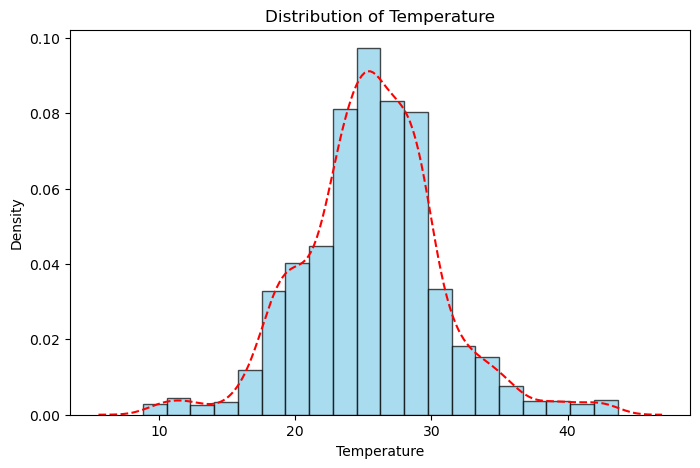

In [19]:
plt.figure(figsize=(8, 5))

# Plot the histogram using matplotlib
plt.hist(df['temperature'], bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Optionally, plot the kernel density estimate
sns.kdeplot(df['temperature'], color='red', linestyle='dashed')

# Set plot title and labels
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')

# Show the plot
plt.show()

## Biveriate Analysis

In [20]:
df.groupby('K')['label'].value_counts()

K    label 
5    orange     8
6    orange     9
7    orange     5
8    orange    12
9    orange    12
               ..
203  apple      9
204  grapes    12
     apple     10
205  apple     11
     grapes     7
Name: count, Length: 242, dtype: int64

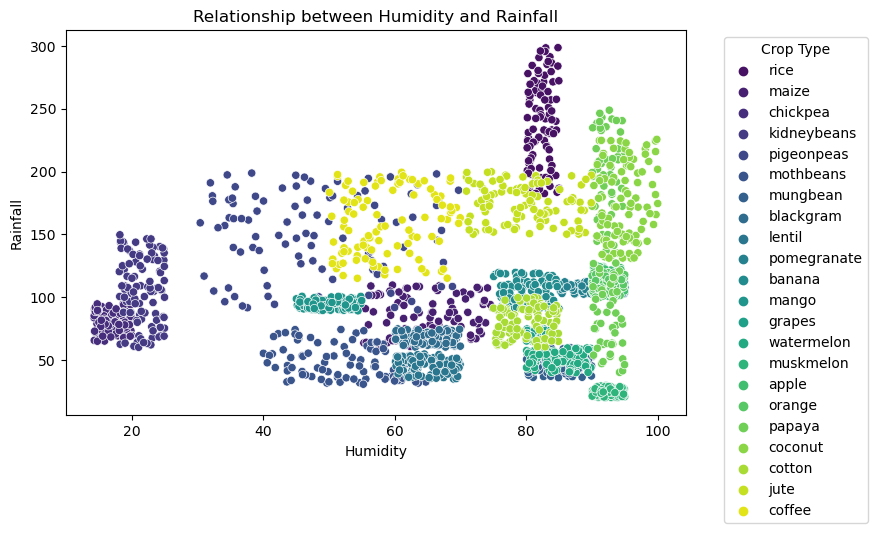

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='humidity', y='rainfall', data=df, hue='label', palette='viridis')
plt.title('Relationship between Humidity and Rainfall')
plt.xlabel('Humidity')
plt.ylabel('Rainfall')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Rice needs heavy rainfall (>200 mm) and a humidity above 80%
Coconut needs high humidity

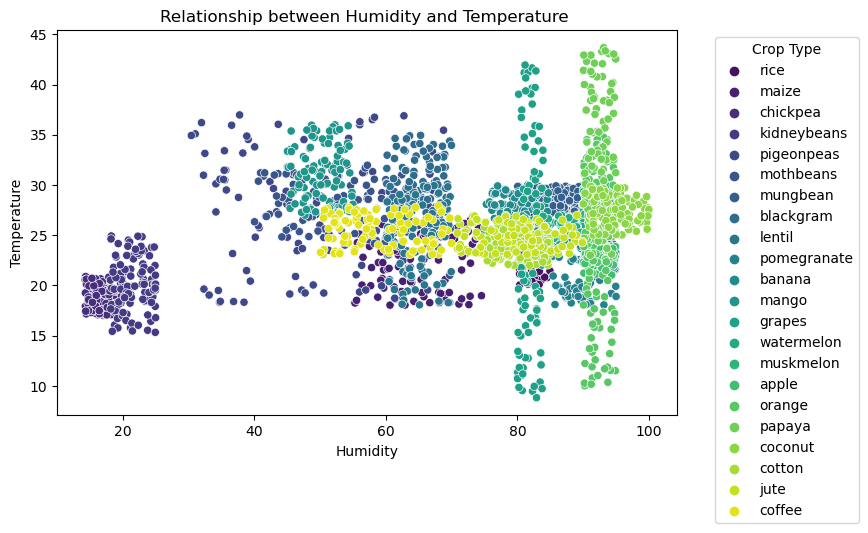

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='humidity', y='temperature', data=df, hue='label', palette='viridis')
plt.title('Relationship between Humidity and Temperature ')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

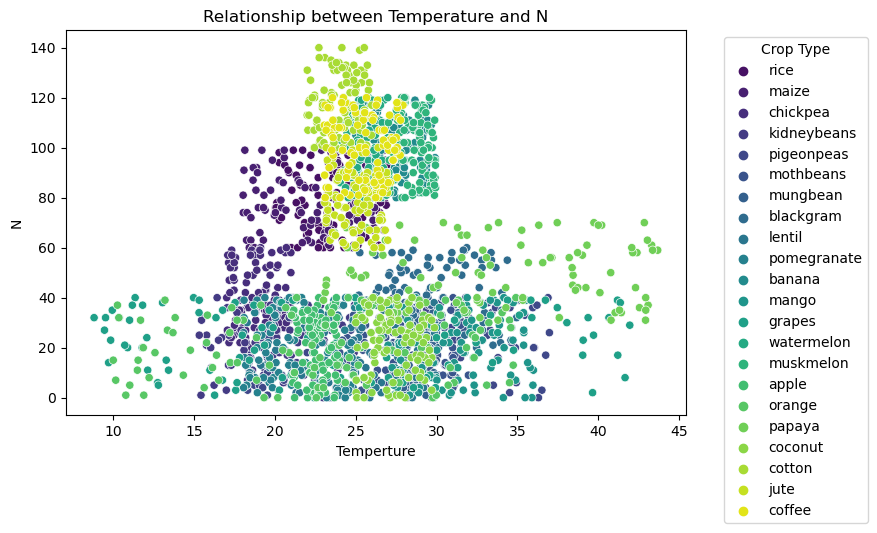

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temperature', y='N', data=df, hue='label', palette='viridis')
plt.title('Relationship between Temperature and N')
plt.xlabel('Temperture')
plt.ylabel('N')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Jute needs high amount of Nitrogen when temperature is around 25.

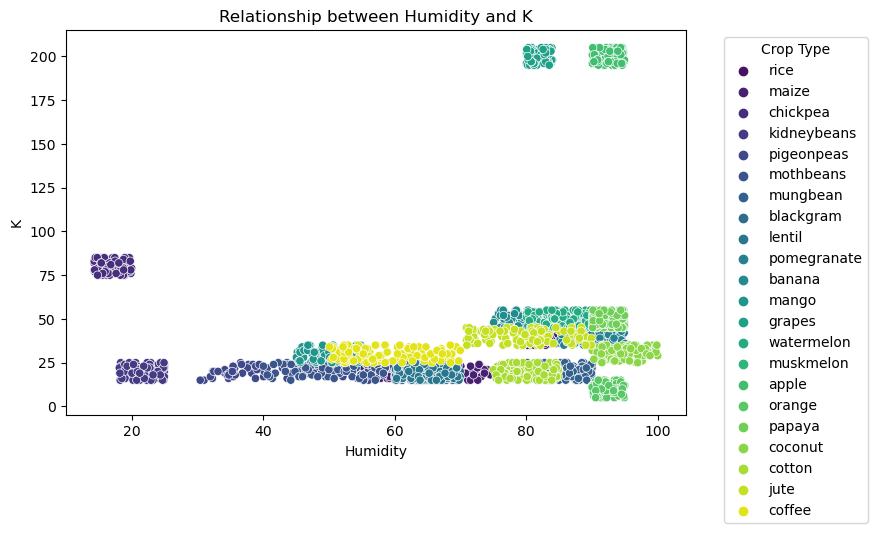

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='humidity', y='K', data=df, hue='label', palette='viridis')
plt.title('Relationship between Humidity and K')
plt.xlabel('Humidity')
plt.ylabel('K')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Orange needs high amount of K and Humidity.

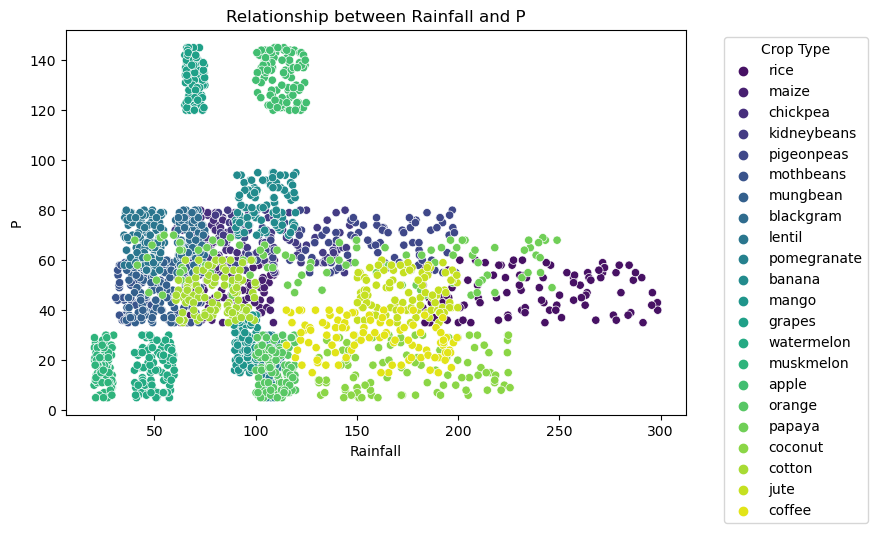

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rainfall', y='P', data=df, hue='label', palette='viridis')
plt.title('Relationship between Rainfall and P')
plt.xlabel('Rainfall')
plt.ylabel('P')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Apple requires less rainfall and amount of Phosphorus 

<Axes: xlabel='ph', ylabel='label'>

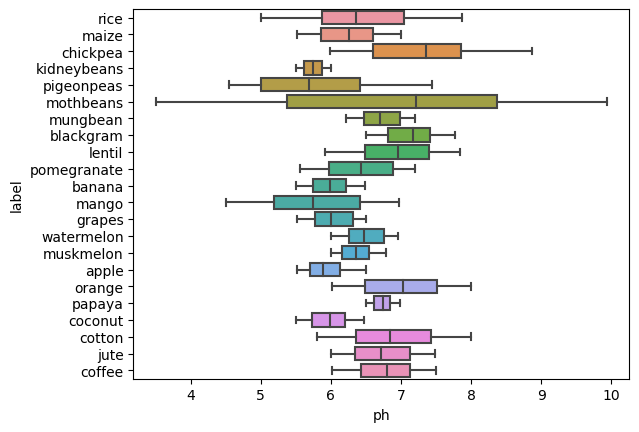

In [26]:
sns.boxplot(y='label',x='ph',data=df)

C:\Users\Ali Hassnain\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


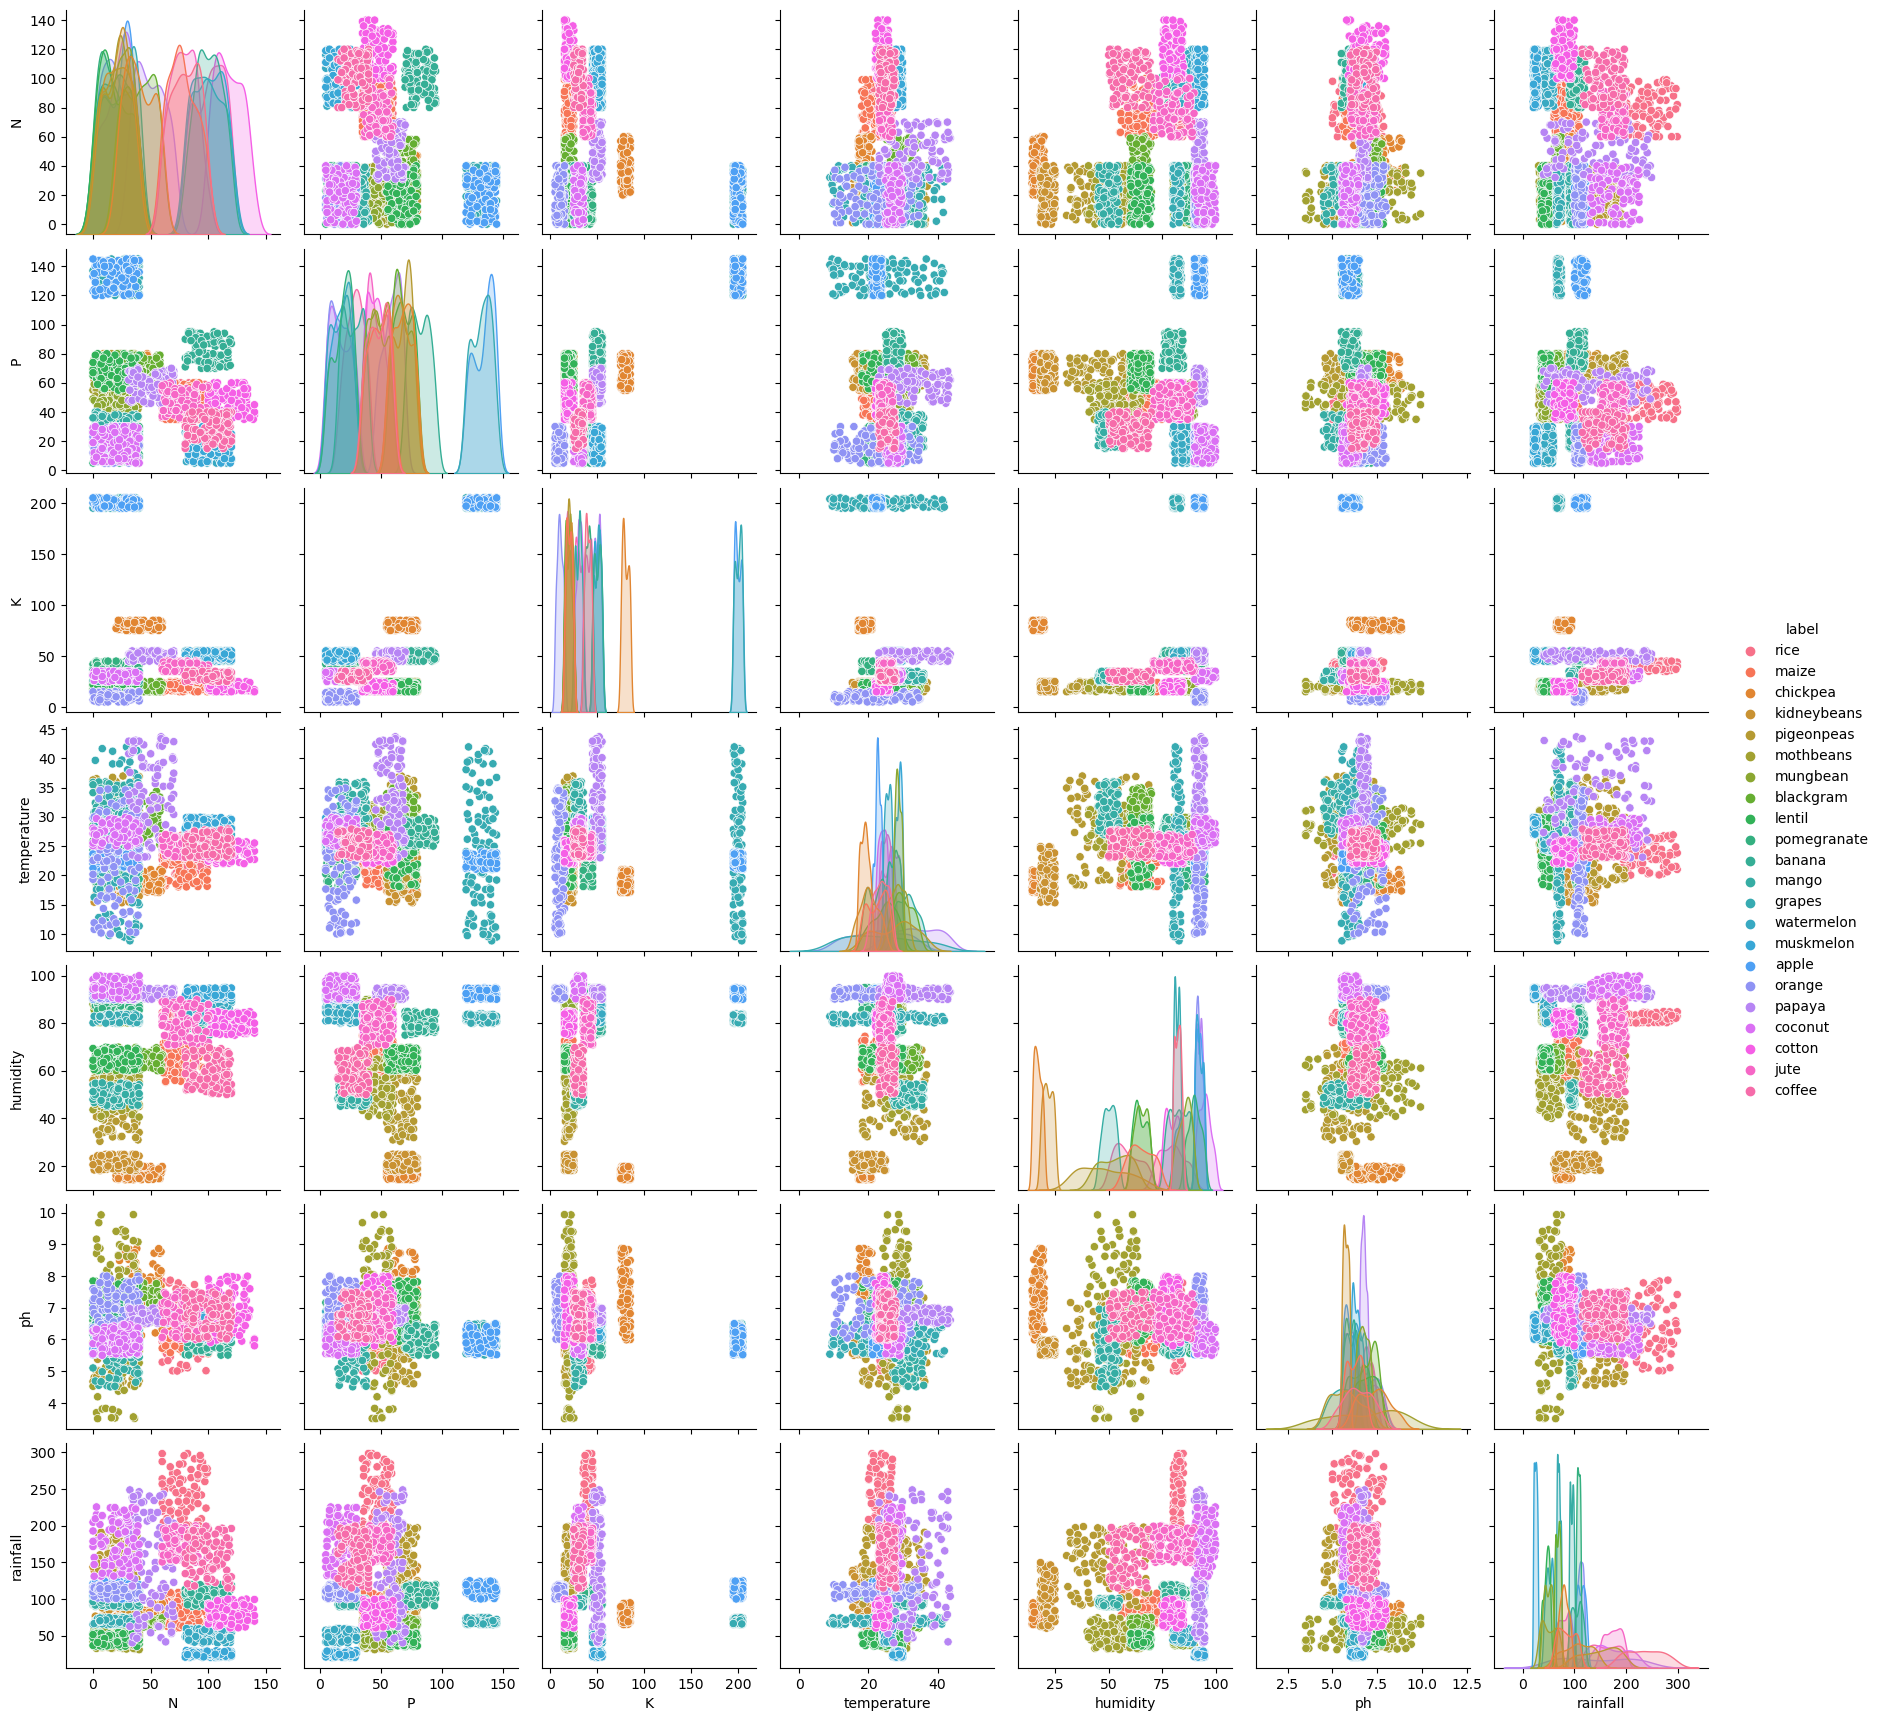

In [27]:
sns.pairplot(df, hue = 'label')

### MulitVariate Analysis 

In [28]:
# Visualization of Descriptive Analysis

cm = sns.light_palette("green", as_cmap=True)
df.describe().T.style.background_gradient(cmap=cm)

A ph stability between 6 and 7 is preffered

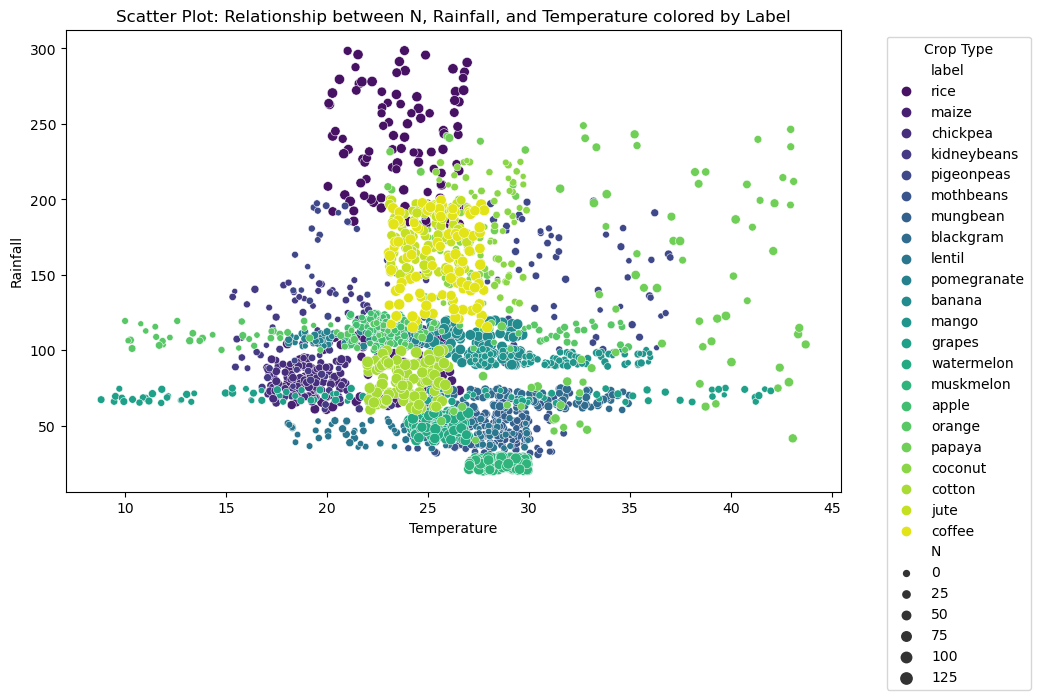

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='rainfall', data=df, hue='label', palette='viridis', size='N')
plt.title('Scatter Plot: Relationship between N, Rainfall, and Temperature colored by Label')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Around temperature 25 and rainfall between 50 and 100 Cotton requires a high amount of nitrogen

## Data Preprocessing 

In [30]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [31]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['label']= label_encoder.fit_transform(df['label'])
df.head()

N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20

## Heat Map [Correlation Map] 

<Axes: >

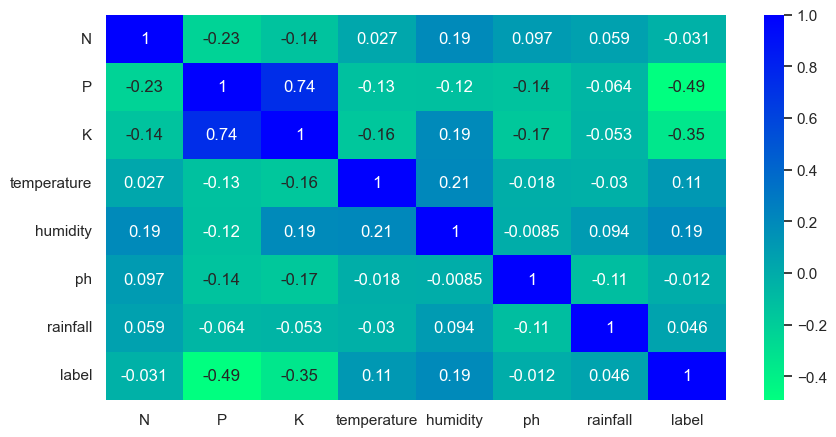

In [32]:
sns.set(rc={'figure.figsize': (10, 5)})
sns.heatmap(df.corr(),annot=True,cmap='winter_r')

<Axes: >

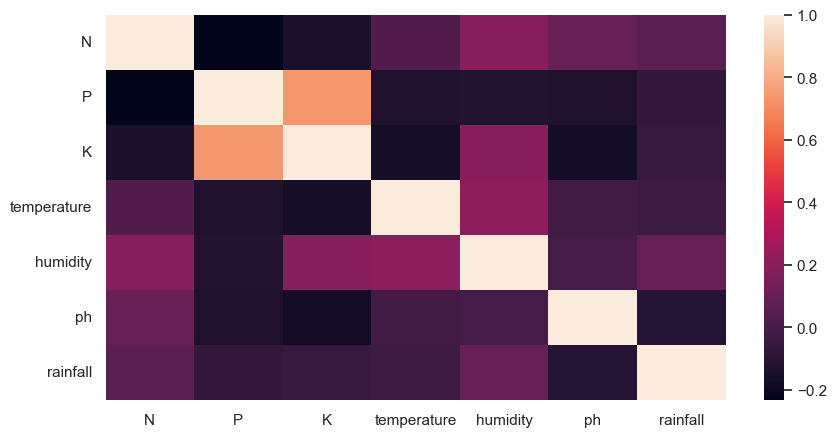

In [33]:
X=df[['N','P','K','temperature','humidity','ph','rainfall']]
sns.heatmap(X.corr())

## ML Modeling 

Let's make the data ready for machine learning model

In [34]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

### Feature Scaling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [36]:
X_test

N    P    K  temperature   humidity        ph    rainfall
1276   25  129  195    17.986678  81.177121  5.777271   72.371277
1446  106   20   51    29.730197  90.970157  6.342573   20.490356
335    33   59   22    22.642369  21.593961  5.947000  122.388601
1458   89    9   47    29.471563  90.770696  6.668383   28.752261
2038   62   49   37    24.217446  82.852840  7.479248  166.136589
...   ...  ...  ...          ...        ...       ...         ...
1987  117   43   25    24.688548  78.512070  7.839849   69.311536
592    40   55   18    30.382579  40.592607  7.115994   47.954065
470     3   60   19    25.746794  40.719259  4.820788  100.779163
1204   24  131  196    22.032962  83.743728  5.732454   65.344408
872    14   59   22    23.827235  67.898153  6.766607   46.907251

[550 rows x 7 columns]

In [37]:
y_test

1276     7
1446    15
335      9
1458    15
2038     8
        ..
1987     6
592     13
470     18
1204     7
872     10
Name: target, Length: 550, dtype: int8

In [38]:
X_test_scaled

array([[1.78571429e-01, 8.85714286e-01, 9.50000000e-01, ...,
        7.80635632e-01, 3.52837015e-01, 1.86956311e-01],
       [7.57142857e-01, 1.07142857e-01, 2.30000000e-01, ...,
        8.94874993e-01, 4.40825998e-01, 4.68528757e-04],
       [2.35714286e-01, 3.85714286e-01, 8.50000000e-02, ...,
        8.55762148e-02, 3.79255120e-01, 3.66745331e-01],
       ...,
       [2.14285714e-02, 3.92857143e-01, 7.00000000e-02, ...,
        3.08679835e-01, 2.03960752e-01, 2.89069451e-01],
       [1.71428571e-01, 9.00000000e-01, 9.55000000e-01, ...,
        8.10576044e-01, 3.45861133e-01, 1.61697985e-01],
       [1.00000000e-01, 3.85714286e-01, 8.50000000e-02, ...,
        6.25731596e-01, 5.06826661e-01, 9.54249792e-02]])

In [39]:
X_train_scaled

array([[0.64285714, 0.27857143, 0.165     , ..., 0.81221086, 0.61679743,
        0.79382191],
       [0.12142857, 0.48571429, 0.065     , ..., 0.23625665, 0.33028052,
        0.63628751],
       [0.17142857, 0.34285714, 0.06      , ..., 0.87281   , 0.45307532,
        0.13407257],
       ...,
       [0.65714286, 0.54285714, 0.235     , ..., 0.72640287, 0.37060324,
        0.29958316],
       [0.2       , 0.37857143, 0.38      , ..., 0.02665663, 0.41558809,
        0.2623663 ],
       [0.67857143, 0.49285714, 0.225     , ..., 0.77240463, 0.38789088,
        0.32258513]])

### Feature Importantce 

In [40]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)
feature_imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns,columns=['Importance'])

In [41]:
feature_imp.sort_values(by='Importance',ascending=False)

Importance
humidity       1.729954
K              1.657040
rainfall       1.637358
P              1.317544
temperature    1.017901
N              0.993842
ph             0.686067

## MODEL SELECTION

## KNN Classifier for Crop prediction

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_acc = knn.score(X_test_scaled, y_test)

In [43]:
print(f'The accuracy score is {(knn_acc)*100:.2f}')

The accuracy score is 97.82


### Confusion Matrix 

<Axes: >

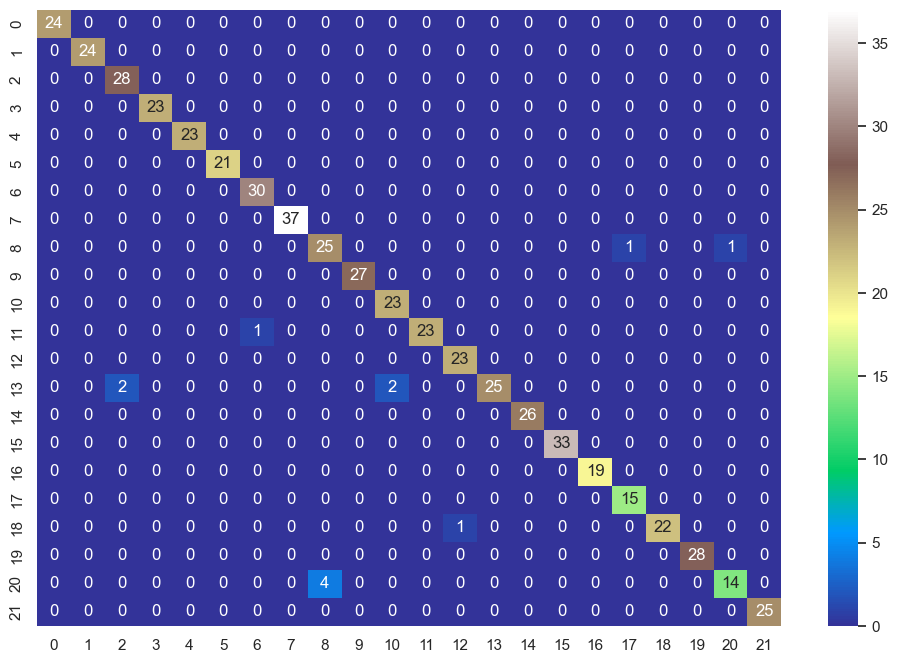

In [44]:
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

Let's try different values of n_neighbors to fine tune and get better results

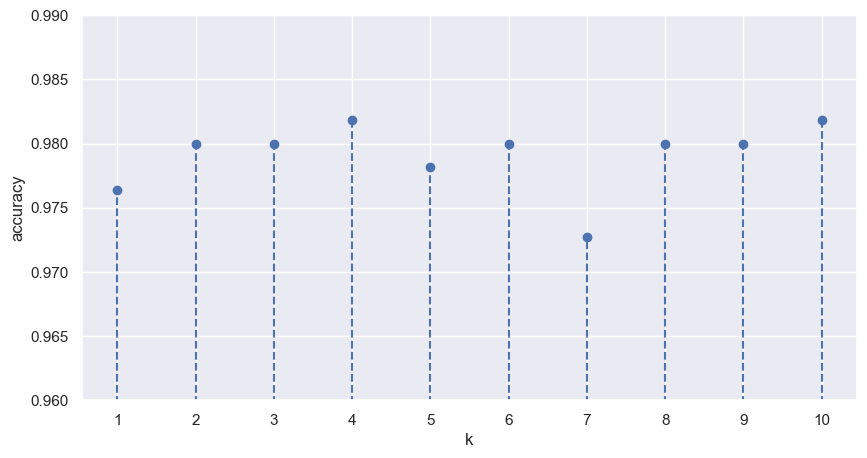

In [45]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

### Testing on a Single Input

In [48]:

user_input = np.array([25,129,195,17.986678,81.177121,5.777271,72.371277])
user_input = user_input.reshape(1, -1) 


user_prediction = clf.predict(user_input)


predicted_crop = label_encoder.inverse_transform(user_prediction)[0]

# Print the predicted class
print("Predicted class:", predicted_crop)


Predicted class: grapes


C:\Users\Ali Hassnain\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
25	129	195	17.986678	81.177121	5.777271	72.371277	grapes

## Classifying using decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
dt_acc = clf.score(X_test,y_test)

print(f'The accuracy score is {(dt_acc)*100:.2f}')

The accuracy score is 98.73


Let's visualize the import features which are taken into consideration by decision trees

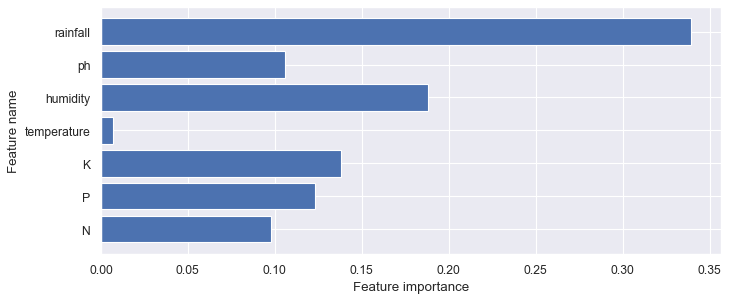

In [49]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

## Classification using Random Forest

In [50]:
'''
max depth and n_estimator are important to fine tune otherwise trees will be densely graphed
which will be a classic case of overfitting. max_depth=4 and n_estimators=10
gives pretty much satisfying results by making sure model is able to generalize well.
'''

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

rf_acc = clf.score(X_test, y_test)

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


### Classification Report 

C:\Users\Ali Hassnain\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


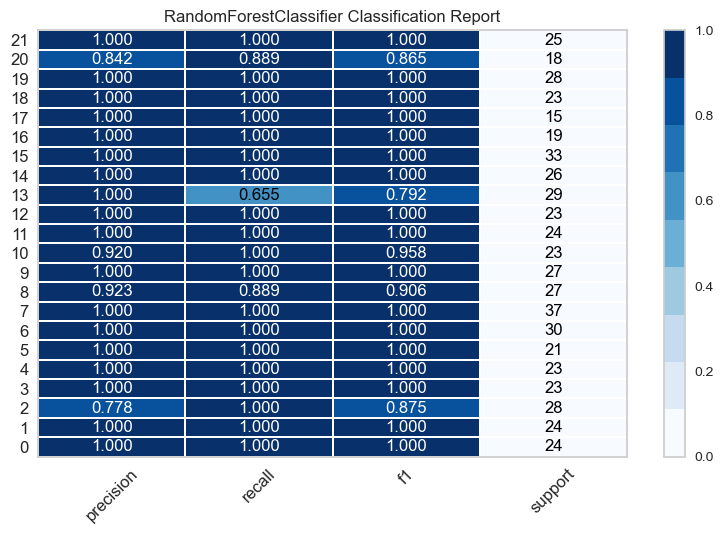

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [51]:
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Classification using Logistic Regression 

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logistic_reg = LogisticRegression()

# Fit the model to the training data
logistic_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test_scaled)

# Evaluate the model
lr_acc = accuracy_score(y_test, y_pred)
print(f'The accuracy score is {(lr_acc)*100:.2f}')

The accuracy score is 94.18


### Classification Report 

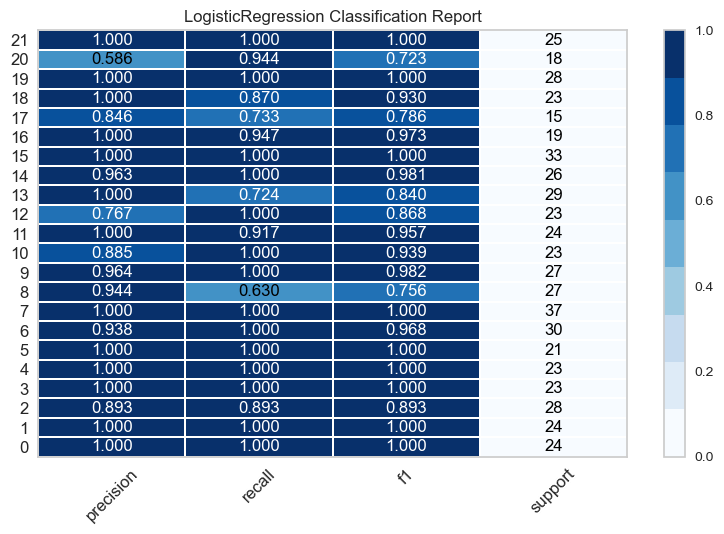

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [53]:
from yellowbrick.classifier import ClassificationReport
classes = list(targets.values())
visualizer = ClassificationReport(logistic_reg, classes=classes, support=True, cmap="Blues")

visualizer.fit(X_train_scaled, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

## Classification using Naive Bayes 

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 99.45
The cross validated score for Gaussian Naive Bayes classifier is: 99.5


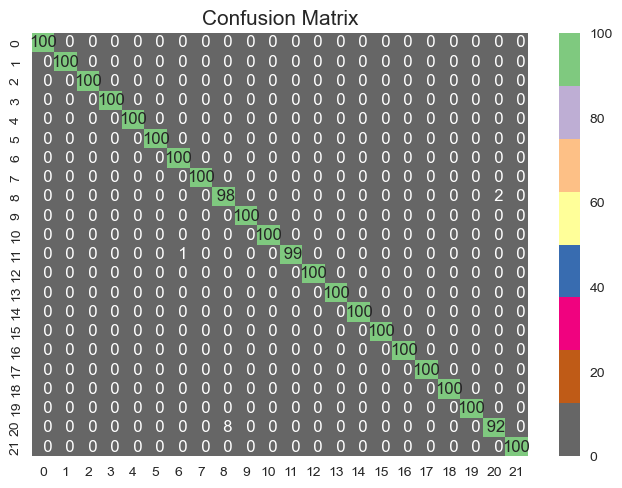

In [55]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train_scaled,y_train)
prediction_gnb=model.predict(X_test_scaled)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
nb_acc = accuracy_score(prediction_gnb,y_test)
kfold = KFold(n_splits=8) # split the data into 10 equal parts

result_gnb=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

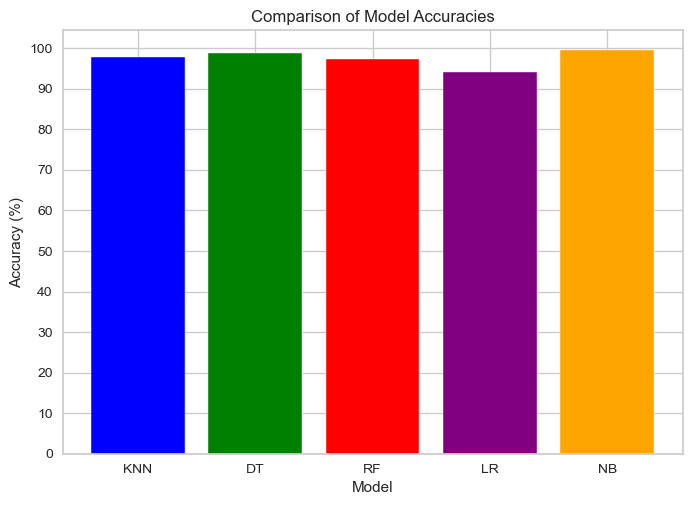

In [56]:
models = ['KNN', 'DT', 'RF', 'LR', 'NB']
accuracies = [knn_acc * 100, dt_acc * 100, rf_acc * 100, lr_acc * 100, nb_acc * 100]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple','orange'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
# Set y-axis ticks to represent percentages
plt.yticks(range(0, 101, 10))

# Display the plot
plt.show()